In [4]:
import numpy as np 
import pandas as pd 
import nltk
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import re

books_df = pd.read_csv('Book1.csv')
books_df.head()


,title,format,year,price,author,rating,publisher,length,city/country,categories,quantity
0,The Spanish Love Deception,Paperback,2021,15.74,Elena Armas,5.00,Simon & Schuster Ltd,480.0,"London, United Kingdom",Fiction Books,9
1,It Ends With Us: The most heartbreaking novel ...,Paperback,2016,16.77,Colleen Hoover,4.42,Simon & Schuster Ltd,384.0,"London, United Kingdom",Contemporary Fiction,45
2,Immune,Hardback,2021,50.66,Philipp Dettmer,4.58,HODDER & STOUGHTON,368.0,"London, United Kingdom",Medical,6
3,The Midnight Library,Paperback,2021,15.00,Matt Haig,4.09,Canongate Books Ltd,304.0,"Edinburgh, United Kingdom",Contemporary Fiction,12
4,Ugly Love,Paperback,2016,19.28,Colleen Hoover,4.26,Simon & Schuster Ltd,352.0,"London, United Kingdom",Contemporary Fiction,38


<AxesSubplot:>

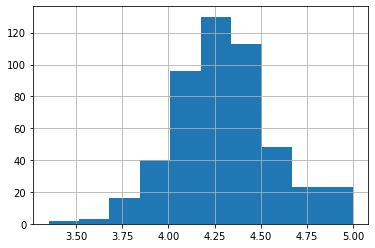

In [5]:
books_df['rating'].hist()

In [6]:
with open('customers.csv', mode='w', newline='') as cust:
    writer = csv.writer(cust)
    header_row = ['CustomerID', 'First Name', 'Last Name','Student', 'Loyalty']
    writer.writerow(header_row)
cust_df = pd.read_csv('customers.csv')
cust_df.head()

,CustomerID,First Name,Last Name,Student,Loyalty


In [7]:
with open('transactions.csv', mode='w', newline='') as tran:
    writer = csv.writer(tran)
    header_row = ['Date', 'Cost', 'Book','Customer', 'Student','Loyalty']
    writer.writerow(header_row)
tran_df = pd.read_csv('transactions.csv')
tran_df.head()

,Date,Cost,Book,Customer,Discount,Loyalty


In [12]:
class Customer():
    def __init__(self, cust_id, firstName, lastName, student = False, loyalty = False):
        self.cust_id = cust_id
        self.firstName = firstName
        self.lastName = lastName
        self.student = student
        self.loyalty = loyalty
    def is_student(self):
        student = True

    def join_loyalty(self):
        loyalty = True

In [10]:
print('########################')
print('#     Book DB     #')
print('########################')
continueProg = True
startedDay = False
while not startedDay:
    date = input("Enter a date (MM/DD/YYYY): ")
    pattern = r'^\d{2}/\d{2}/\d{4}$'
    if re.match(pattern, date):
        startedDay = True
while (continueProg):
    print('\n')
    print('[Q] Quit')
    print('[N] New Customer added')
    print('[T] New Transaction')
    print('[E] End Day')
    choice = input('Select menu: ')
    if choice == 'Q': 
        # Q menu is complete. No need to modify.
        continueProg = False
    elif choice == 'N':
        # [6 points] A menu is incomplete. Complete this menu.
        try:
            count = cust_df.iloc[-1]['CustomerID']
        except IndexError:
            count = 1
        else:
            count+=1
        first = input("Enter first name: ")
        last = input("Enter last name: ")
        stu = "null"
        continueIn = True
        while continueIn:
            stu = input("Is the customer a student?  Enter Y/N : ")
            if stu == "N" or stu == "Y":
                continueIn = False
        if stu.lower() == 'y':
            stu = True
        elif stu.lower() == 'n':
            stu = False
        loyalty = "null"
        continueIn = True
        while continueIn:
            loyalty = input("Does the customer want to be a part of the loyalty program?  Enter Y/N : ")
            if loyalty == "N" or loyalty == "Y":
                continueIn = False
        if loyalty.lower() == 'y':
            loyalty = True
        elif loyalty.lower() == 'n':
            loyalty = False
        x = Customer(count, first, last, stu, loyalty)
        data = ({'CustomerID' : count ,'First Name' :  first, 'Last Name' : last, 'Student' : stu, 'Loyalty' :loyalty})
        cust_df = cust_df.append(data, ignore_index=True)
        
        
        
    elif choice == 'T':
        found = False
        while not found:
            book = input("Enter Book Name: ")
            if book in books_df['title'].values:
                found = True
            elif not found: 
                print("Invalid Book.  Try again.")
        price = book_df.loc[book_df['title'] == book, 'price'].iloc[0]
        customer = input("Enter first and last name: ")
        first, last = customer.split()
        if first in cust_df['First Name'].values and cust_df.loc[cust_df['First Name'] == first, 'Last Name'].iloc[0] == last:
            print("Customer in system, no new data entry needed")
        else:
            print("No record on file for customer, finish the record")
            count+=1
            stu = "null"
            continueIn = True
            while continueIn:
                stu = input("Is the customer a student?  Enter Y/N : ")
                if stu == "N" or stu == "Y":
                    continueIn = False
            if stu.lower() == 'y':
                stu = True
            elif stu.lower() == 'n':
                stu = False
            loyalty = "null"
            continueIn = True
            while continueIn:
                loyalty = input("Does the customer want to be a part of the loyalty program?  Enter Y/N : ")
                if loyalty == "N" or loyalty == "Y":
                    continueIn = False
            if loyalty.lower() == 'y':
                loyalty = True
            elif loyalty.lower() == 'n':
                loyalty = False
            x = Customer(count, first, last, stu, loyalty)
            data = ({'CustomerID' : count ,'First Name' :  first, 'Last Name' : last, 'Student' : stu, 'Loyalty' :loyalty})
            cust_df = cust_df.append(data, ignore_index=True)
        customer = 
        
        
    elif choice == 'B':
        bmilb = input('Enter BMI lower bound: ')
        # [7 points] S menu is incomplete. Complete this menu.
        display(pd.read_sql(f"SELECT * FROM Insurance WHERE BMI >= {bmilb} LIMIT 5", connection))
        
        
    else:
        # You do not need to modify this else block. It is complete.
        print('Invalid menu choice. Enter again.')

########################
#     Book DB     #
########################
Enter a date (MM/DD/YYYY): 04/26/2023


[Q] Quit
[N] New Customer added
[T] New Transaction
[E] End Day
Select menu: N
Enter first name: Christian
Enter last name: Taylor
Is the customer a student?  Enter Y/N : Y
Does the customer want to be a part of the loyalty program?  Enter Y/N : Y


[Q] Quit
[N] New Customer added
[T] New Transaction
[E] End Day
Select menu: Q


In [11]:
cust_df.head()

,CustomerID,First Name,Last Name,Student,Loyalty
0,1,Christian,Taylor,True,True
